## Credit Card Fraud Detection System

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE

import joblib 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
Data_set = pd.read_csv("creditcard.csv")

In [3]:
Data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Data_set.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
pd.options.display.max_columns=None

In [6]:
Data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
Data_set.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
Data_set.shape

(284807, 31)

In [9]:
Data_set.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
Data_set.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
scaling_feature = StandardScaler()
Data_set['Amount'] = scaling_feature.fit_transform(pd.DataFrame(Data_set['Amount']))

In [13]:
Data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
Data_set.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [15]:
Data_set = Data_set.drop(['Time'], axis = 1)

In [16]:
Data_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [17]:
print("Duplicate values are: ", Data_set.duplicated().sum())

Duplicate values are:  9144


In [18]:
Data_set.shape

(284807, 30)

In [19]:
Data_set = Data_set.drop_duplicates()

In [20]:
Data_set.shape

(275663, 30)

In [21]:
Data_set.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,-0.007174,-0.005347,0.000539,0.000681,-0.010315,-0.004319,0.000479,0.003874,0.000511,0.003407,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,0.008911,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,1.020571,0.998661,0.999660,0.952571,0.917772,0.880320,0.844821,0.841638,0.820520,0.779950,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,1.012371,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,-0.772693,-0.413717,-0.654360,-0.425932,-0.596079,-0.477642,-0.482600,-0.498396,-0.464409,-0.212027,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,-0.328041,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,-0.039469,0.133349,-0.011557,0.049552,0.036145,0.061670,-0.063489,0.001392,0.001119,-0.058053,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,-0.258315,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,0.734969,0.614670,0.668570,0.492169,0.638997,0.524709,0.401407,0.507708,0.465782,0.139803,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,-0.033742,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.000000


In [22]:
Data_set['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

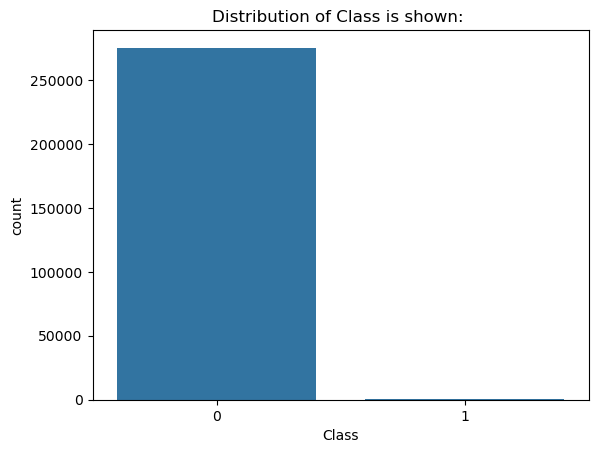

In [23]:
sns.countplot(x = 'Class', data = Data_set)
plt.title('Distribution of Class is shown: ')
plt.show()

In [24]:
X_set = Data_set.drop('Class', axis=1)
Y_set = Data_set['Class']

In [25]:
X_training, X_testing, Y_training, Y_testing = train_test_split(X_set, Y_set, test_size = 0.2, random_state = 42)

In [26]:
Classifier_models = {
    "Logistic regression model": LogisticRegression(),
    "Decision tree classifier model": DecisionTreeClassifier()
}

In [27]:
for model_name, classify in Classifier_models.items():
    print(f"\n ~~~~~~~~~~[ {model_name} ]~~~~~~~~~~")
    classify.fit(X_training, Y_training)
    Y_predicting = classify.predict(X_testing)
    print(f"Accuracy is =  {accuracy_score(Y_testing, Y_predicting)}")
    print(f"Recall is =    {recall_score(Y_testing, Y_predicting)}")
    print(f"Precision is = {precision_score(Y_testing, Y_predicting)}")
    print(f"F1-score is =  {f1_score(Y_testing, Y_predicting)}")



 ~~~~~~~~~~[ Logistic regression model ]~~~~~~~~~~
Accuracy is =  0.9992563437505668
Recall is =    0.6263736263736264
Precision is = 0.890625
F1-score is =  0.7354838709677419

 ~~~~~~~~~~[ Decision tree classifier model ]~~~~~~~~~~
Accuracy is =  0.9989298605191084
Recall is =    0.7472527472527473
Precision is = 0.6538461538461539
F1-score is =  0.6974358974358974


In [28]:
# Undersampling technique

In [29]:
Non_fraudulent_data = Data_set[Data_set['Class'] == 0]
Fraudulent_data = Data_set[Data_set['Class'] == 1]

In [30]:
Non_fraudulent_data.shape

(275190, 30)

In [31]:
Fraudulent_data.shape

(473, 30)

In [32]:
Non_fraud_sample = Non_fraudulent_data.sample(n = 473, random_state = 42)

In [33]:
Non_fraud_sample.shape

(473, 30)

In [34]:
New_dataset = pd.concat([Non_fraud_sample, Fraudulent_data], ignore_index = True)

In [35]:
New_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-7.811334,6.969680,-4.649212,-2.949434,-0.624893,-1.590217,0.765963,0.568942,5.269598,9.231557,1.219140,0.604376,-0.977137,-0.901066,-0.318567,-1.023622,-0.741934,-0.248739,-0.715731,3.567887,-0.571304,0.380836,0.227178,0.667859,1.068584,-0.019421,1.534948,0.671389,-0.351390,0
1,0.869423,-0.607480,0.336087,0.781818,-0.775952,-0.370453,0.013696,0.026510,0.365969,-0.084738,0.859991,0.583960,-1.185722,0.376478,-0.760694,-0.005623,-0.138804,-0.073441,0.496290,0.167850,-0.095756,-0.564942,-0.129262,0.358449,0.302820,0.342941,-0.073088,0.027958,0.344317,0
2,-0.793500,0.761478,1.676177,-0.858703,0.311746,-1.684763,0.973105,-0.399532,0.608199,-1.318882,1.067027,-2.009790,2.225045,1.551677,-0.668431,-0.022512,0.410314,-0.538840,-0.902940,-0.009325,-0.083441,-0.124702,-0.112608,0.950300,0.101658,0.807278,-0.086489,0.076581,-0.264072,0
3,-2.957746,2.095728,0.837337,-2.097049,-1.012500,1.030869,-1.553094,-5.946483,2.662309,0.904936,0.855569,0.958989,-0.900279,-0.582497,0.300068,-1.051800,0.236958,0.892151,1.973151,-0.823362,5.491248,-0.935815,0.491248,-0.027630,-0.014903,0.110080,-0.520144,-0.150498,-0.262073,0
4,1.935386,-0.224695,-1.681700,0.518687,0.143779,-1.289113,0.610695,-0.473615,0.336711,0.060044,-0.796246,0.487835,0.105684,0.390965,-0.414857,-0.628748,-0.024662,-0.949056,0.100974,-0.078250,0.018664,0.118134,0.015350,0.058338,0.143633,0.555108,-0.106240,-0.063783,-0.033582,0


In [36]:
New_dataset['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [37]:
X_set = New_dataset.drop('Class', axis=1)
Y_set = New_dataset['Class']

In [38]:
X_training, X_testing, Y_training, Y_testing = train_test_split(X_set, Y_set, test_size = 0.2, random_state = 42)

In [39]:
for model_name, classify in Classifier_models.items():
    print(f"\n ~~~~~~~~~~[ {model_name} (Undersampling) ]~~~~~~~~~~")
    classify.fit(X_training, Y_training)
    Y_predicting = classify.predict(X_testing)
    print(f"Accuracy is =  {accuracy_score(Y_testing, Y_predicting)}")
    print(f"Recall is =    {recall_score(Y_testing, Y_predicting)}")
    print(f"Precision is = {precision_score(Y_testing, Y_predicting)}")
    print(f"F1-score is =  {f1_score(Y_testing, Y_predicting)}")



 ~~~~~~~~~~[ Logistic regression model (Undersampling) ]~~~~~~~~~~
Accuracy is =  0.9421052631578948
Recall is =    0.9117647058823529
Precision is = 0.9789473684210527
F1-score is =  0.9441624365482234

 ~~~~~~~~~~[ Decision tree classifier model (Undersampling) ]~~~~~~~~~~
Accuracy is =  0.9210526315789473
Recall is =    0.9313725490196079
Precision is = 0.9223300970873787
F1-score is =  0.926829268292683


In [40]:
# SMOTE oversampling technique

In [41]:
X_set = Data_set.drop('Class', axis=1)
Y_set = Data_set['Class']

In [42]:
X_set.shape

(275663, 29)

In [43]:
Y_set.shape

(275663,)

In [44]:
X_resample, Y_resample = SMOTE().fit_resample(X_set, Y_set)

In [45]:
print("After SMOTE oversampling: ", Y_resample.value_counts())

After SMOTE oversampling:  Class
0    275190
1    275190
Name: count, dtype: int64


In [46]:
X_training, X_testing, Y_training, Y_testing = train_test_split(X_resample, Y_resample, test_size = 0.2, random_state = 42)

In [47]:

for model_name, classify in Classifier_models.items():
    print(f"\n ----------[ {model_name} (SMOTE oversampling) ]----------")
    classify.fit(X_training, Y_training)
    Y_predicting = classify.predict(X_testing)
    print(f"Accuracy is =  {accuracy_score(Y_testing, Y_predicting)}")
    print(f"Recall is =    {recall_score(Y_testing, Y_predicting)}")
    print(f"Precision is = {precision_score(Y_testing, Y_predicting)}")
    print(f"F1-score is =  {f1_score(Y_testing, Y_predicting)}")




 ----------[ Logistic regression model (SMOTE oversampling) ]----------
Accuracy is =  0.9448381118499946
Recall is =    0.915222806028762
Precision is = 0.9727724207231058
F1-score is =  0.9431205035971223

 ----------[ Decision tree classifier model (SMOTE oversampling) ]----------
Accuracy is =  0.9983465968966896
Recall is =    0.9988727887569769
Precision is = 0.9978205989720492
F1-score is =  0.9983464166303242


In [48]:
The_final_model = DecisionTreeClassifier()
The_final_model.fit(X_resample, Y_resample)

DecisionTreeClassifier()

In [49]:
joblib.dump(The_final_model, "credit_card_fraud_detection_model.pkl")
joblib.dump(scaling_feature, "scaler.pkl")

['scaler.pkl']

In [50]:

original_data = pd.read_csv("creditcard.csv")

data_inputs = original_data.drop(columns = ["Time", "Class"])

data_inputs.to_csv("Input_cases.csv", index = False)

print("Input V1 to V2 and Amount are saved")

print("The shape is: ", data_inputs.shape)  


Input V1 to V2 and Amount are saved
The shape is:  (284807, 29)


In [51]:
%%writefile UI_app.py
import pandas as pd
import streamlit as st
import joblib

Model = joblib.load("credit_card_fraud_detection_model.pkl")
Scaling = joblib.load("scaler.pkl")

st.set_page_config(page_title = "Credit Card Fraud Detection System", 
                   layout = "centered")

st.markdown("<h1 style = 'text-align: center;'> Credit Card Fraud Detection System</h1>",
            unsafe_allow_html = True)


The_file = st.file_uploader("The CSV file should be upload here", type = ["csv"])

if The_file is not None:
    try:
        Input_data = pd.read_csv(The_file)

        col = [f"V{i}" for i in range(1, 29)] + ["Amount"]

        if list(Input_data.columns) != col:
            st.error(f"Input V1 to V28 and Amount must be there in CSV file")

        else:
            st.success("The file is uploaded effortlessly")

            Index_row = st.number_input("Choose the row index", min_value = 1, max_value = len(Input_data), step = 1)

            if st.button("Predict"):
                row_input = Input_data.iloc[[Index_row - 1]]

                output_result = Model.predict(row_input)[0]

                if output_result == 0:
                    label = "It is a Legitimate Transaction."
                else:
                    label = "It is a Fraudulent Transaction." 

                
                st.subheader("Show the choosen row data")
                st.write(row_input)

                st.subheader("The prediction is: ")
                st.success(f"Prediction: {label}")

    except Exception as e:
        st.error(f"Unexpected error: {e}")



Writing UI_app.py
